# 1. Importing the possibly required libraries for EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize
%matplotlib inline

# 2. Loading the data into the data frame

In [2]:
#the dataset is in csv format so we'll use read_csv function in pandas and replace blank space with NaN by "na_values=' ' "
df_data=pd.read_csv('webmd.csv', na_values=' ')

df_data.shape

(362806, 12)

In [3]:
#to display the top 5 rows
df_data.head(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,NaN,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,NaN,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,NaN,1


In [4]:
#to display the bottom 5 rows
df_data.tail(5)

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
362801,55-64,Stop Smoking,11/14/2008,chantix,144470,5,5,I took the whole 12 weeks.I could have stopped...,5,Female,"Nausea , headache , vomiting , drowsiness, g...",2
362802,NaN,Other,11/14/2008,chantix,144470,2,3,My dad strated taking Chantix about 1 month ag...,1,NaN,"Nausea , headache , vomiting , drowsiness, g...",16
362803,25-34,Stop Smoking,11/13/2008,chantix,144470,2,4,"As long as I was on chantix, I didn't smoke. ...",2,Female,"Nausea , headache , vomiting , drowsiness, g...",3
362804,55-64,Stop Smoking,11/13/2008,chantix,144470,5,5,Started this medication Oct 5th 2008. Haven't ...,5,Male,"Nausea , headache , vomiting , drowsiness, g...",1
362805,45-54,Stop Smoking,11/12/2008,chantix,144470,4,5,"One year ago, I tried Chantix and had to stop ...",5,Female,"Nausea , headache , vomiting , drowsiness, g...",3


# 3. Checking the dataframe detail

In [5]:
#check the number of features and rows of data
print("Dataset contains: " + str(df_data.shape[0]) + " rows and " + str(df_data.shape[1]) + " columns")

#describe the model's detail information datatype of each attributes
df_data.info()

Dataset contains: 362806 rows and 12 columns
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
Age              350604 non-null object
Condition        362763 non-null object
Date             362806 non-null object
Drug             362806 non-null object
DrugId           362806 non-null int64
EaseofUse        362806 non-null int64
Effectiveness    362806 non-null int64
Reviews          320945 non-null object
Satisfaction     362806 non-null int64
Sex              336269 non-null object
Sides            345346 non-null object
UsefulCount      362806 non-null int64
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


looking at the dataframe information detail there are columns with null values since the total value count is less that row value (362806).

# 4. Dropping irrelevant columns

In [6]:
#Only some attributes are considered in this project we'll drop attributes that aren't considered for the time being. 
df_data=df_data.drop(['Date', 'DrugId', 'Reviews', 'Sides', 'UsefulCount'], axis=1)

In [7]:
#to display the random 5 rows
df_data.sample(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Satisfaction,Sex
165166,19-24,Bipolar I Disorder with Most Recent Episode Mixed,"saphris tablet, sublingual",4,4,5,Female
113280,45-54,Post-Menopausal Osteoporosis Prevention,prempro,5,3,3,Female
256663,55-64,Advanced Breast Cancer Progression Post-Anties...,exemestane,5,5,5,Female
270184,55-64,Pain Originating From a Nerve,"gabapentin tablet, extended release 24 hr",5,1,1,Female
256770,45-54,High Blood Pressure,exforge,5,5,3,Male


# 5. Renaming the columns

In [8]:
df_data=df_data.rename(columns={"Satisfaction": "Rating"})
df_data.head(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
0,75 or over,Stuffy Nose,25dph-7.5peh,5,5,5,Male
1,25-34,Cold Symptoms,25dph-7.5peh,5,5,5,Female
2,65-74,Other,warfarin (bulk) 100 % powder,2,3,3,Female
3,75 or over,Other,warfarin (bulk) 100 % powder,2,2,1,Female
4,35-44,Other,warfarin (bulk) 100 % powder,1,1,1,Male


# 6. Dropping the unused rows

In [9]:
#selecting the rows of our target which is only in pain condition  
df_data=df_data[df_data.Condition.str.contains('Pain', na=False)]

#check the number of features and rows of remaining data
print("Dataset contains: " + str(df_data.shape[0]) + " rows and " + str(df_data.shape[1]) + " columns")

Dataset contains: 53649 rows and 7 columns


In [10]:
#to display the random 5 rows
df_data.sample(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
48286,55-64,Nerve Pain after Herpes,neurontin,4,4,4,Female
68917,35-44,Chronic Pain,opana er,5,4,4,Female
3087,55-64,Neuropathic Pain,lyrica,5,4,4,Female
289703,NaN,Pain,hydrocodone-acetaminophen,5,2,3,NaN
297617,65-74,Pain,ibuprofen,3,3,3,Male


# 7. Data Cleaning and Manupulation

Before diving into data analysis it is important to check whether there are missing values, inconsistent formatting, malformed records or nonsensical outliers. Null values checked in the main dataset and after the selecting pain condition the null values needs to be check. Looking at the dataset under consideration, there is no variables that inconsistent formatting and records or nonsensical outliers.

In [11]:
#Check if null values exist in the dataset
print('Do null values exist in the dataset? ' + str(df_data.isnull().values.any()))
#if null values exist calculate the total null vaues in each column:
df_data.isna().sum()

Do null values exist in the dataset? True


Age              1905
Condition           0
Drug                0
EaseofUse           0
Effectiveness       0
Rating              0
Sex              3698
dtype: int64

since Age and Sex are the determining variable through out this project, they cant be null, hence drop the null values from data set.

In [12]:
df_data.dropna(inplace=True)

#Check if null values exist in the dataset
print('Do null values exist in the dataset? ' + str(df_data.isnull().values.any()))

#check the number of features and rows of remaining data
print("Dataset contains: " + str(df_data.shape[0]) + " rows and " + str(df_data.shape[1]) + " columns")

Do null values exist in the dataset? False
Dataset contains: 49313 rows and 7 columns


# 8 Histograms and Density Plots

It is important to visualization the data in a graph to communicate relationships of data with images. We need data visualization maily because visual summary of information makes it easier to identify patterns and trends than looking through thousands of rows. Before considering the relationship between two variables it is important to to summarize information having a single variable. Data analysis that involves the relationship between two different variables is called bivariate data and data that has single or only one variable is known as univariate data.   

## 8.1 Univariate Data Analysis

The variable that does not deal with relationships, but rather it is used to describe something in a dataset the age of the drug users which can be considered as univariate data. Hence, let's see the age demography using value_counts function. As shown in the result the highest and the least number of pain medicine users age range is 45-54 and 0-2 respectively.  

In [13]:
df_data.Age.value_counts()

45-54         13966
55-64         11851
35-44          8579
25-34          5545
65-74          5215
19-24          1962
75 or over     1738
13-18           410
7-12             21
3-6              14
0-2              12
Name: Age, dtype: int64

Using describe fuction, we analyse he above results for further understanding of cumulative number of pain drug users age range including unique age range, mean, standard deviation as well as the persentile.  

In [14]:
#describe the model's Age range feature for initial observations such as min/max 
df_data.Age.value_counts().describe()

count       11.000000
mean      4483.000000
std       5029.976521
min         12.000000
25%        215.500000
50%       1962.000000
75%       7062.000000
max      13966.000000
Name: Age, dtype: float64

The visual representation of the agreegated age range using rectangular bars with lengths proportional to the values that they represent. 

Text(0.5, 1.0, 'Age Frequency')

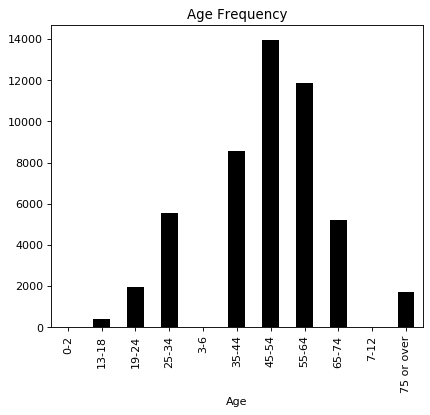

In [15]:
plt.figure(figsize=(6,5), dpi= 80)
df_data.groupby('Age')['Sex'].count().plot(kind='bar', color='k')
plt.title('Age Frequency') 

### 8.1.1 Categorize the Gender of users across Age group

In this sub-section we categorize the gender of users (Female and Male) across all age groups. This categoization helps us to identify the type of condition and satisfaction level toward the type of drug depending on the gender of the users.  

In [16]:
#Exrtacting female users
df_female=df_data[df_data['Sex']=='Female']

In [17]:
df_female.Age.value_counts()

45-54         9019
55-64         7191
35-44         5928
25-34         3771
65-74         3067
19-24         1361
75 or over     911
13-18          296
7-12            10
3-6              9
0-2              7
Name: Age, dtype: int64

In [18]:
#The average ease of use, effectivess and rating for all age group of female users
df_female.groupby('Age').mean()

,EaseofUse,Effectiveness,Rating
Age,,,
0-2,2.714286,3.285714,3.142857
13-18,4.016892,3.307432,2.912162
19-24,4.210140,3.625276,3.243204
25-34,4.112437,3.521612,3.248475
3-6,3.777778,3.666667,3.444444
35-44,4.111505,3.493590,3.276991
45-54,4.129394,3.474443,3.241712
55-64,4.177722,3.509804,3.274371
65-74,4.188132,3.509292,3.289534


In [19]:
#Exrtacting male users
df_male=df_data[df_data['Sex']=='Male']

In [20]:
df_male.Age.value_counts()

45-54         4947
55-64         4660
35-44         2651
65-74         2148
25-34         1774
75 or over     827
19-24          601
13-18          114
7-12            11
3-6              5
0-2              5
Name: Age, dtype: int64

In [21]:
#The average ease of use, effectivess and rating for all age group of male users
df_male.groupby('Age').mean()

,EaseofUse,Effectiveness,Rating
Age,,,
0-2,4.200000,4.400000,4.200000
13-18,4.263158,3.666667,3.377193
19-24,4.276206,3.668885,3.430948
25-34,4.310598,3.673055,3.483089
3-6,2.000000,2.800000,2.600000
35-44,4.313844,3.701999,3.528480
45-54,4.225793,3.580958,3.416010
55-64,4.289270,3.570172,3.407725
65-74,4.198790,3.440410,3.297020


In order to compare the number (frequency) of Female and Male pain medicine users we plot side-by-side bar plots using subplot function. From the side-by-side rectangular bars with lengths proportional to the values for Female and male plot, one can note that the number of female pain medicine users are higher than male users.

Text(0.5, 1.0, 'Male Age Frequency')

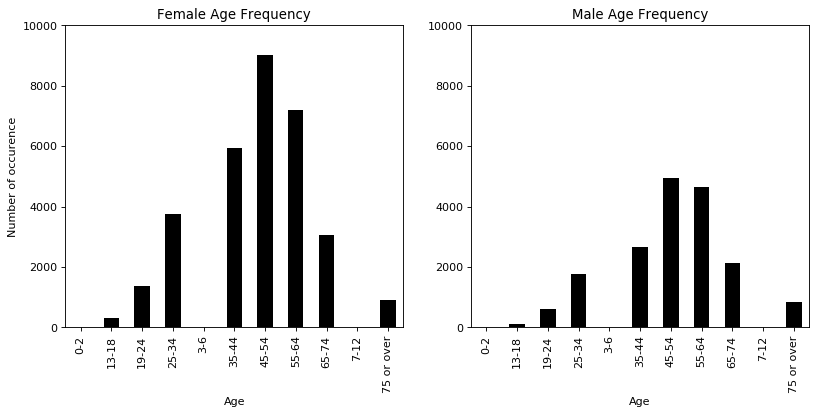

In [22]:
plt.figure(figsize=(12,5), dpi= 80)
plt.subplot(1, 2, 1)
df_female.groupby('Age')['Sex'].count().plot(kind='bar', color='k')
plt.ylim(0,10000)
plt.ylabel('Number of occurence')
plt.title('Female Age Frequency')
plt.subplot(1, 2, 2)
df_male.groupby('Age')['Sex'].count().plot(kind='bar', color='k')
plt.ylim(0,10000)
plt.title('Male Age Frequency')

## 8.2 Bivariate Data (Frequency and Density Histograms Plots)

The purpose of bivariate data is to analyze and explain the relationship between two different variables. In this section we examine and present the relationship between the variables in the dataset.

## 8.2.1 Frequency Histogram

##### 8.2.1.1 Frequency Histogram of top five Drug by Age and Sex

The first bivariate data analysis is teh relationship between users age and drug type. Then we separate this relationship by users sex for comparison purpose. The total unique drugs used for pain relievers is more than 600 which makes it difficult to simply figure out the relationship between the variables. Hence we selected the top five (five most used pain drugs) for analysis purpose. In addition, the age in the dataset is represented as range and for the remaining analysis we replace them with approximate average age for simplicity. 

In [23]:
df_data['Age'].replace(['0-2','3-6','7-12','13-18','19-24','25-34','35-44','45-54','55-64','65-74','75 or over'],
                  [1,5,10,15,20,30,40,50,60,70,80], inplace=True)

In [24]:
df_data.sample(5)

,Age,Condition,Drug,EaseofUse,Effectiveness,Rating,Sex
164123,50,"Disorder characterized by Stiff, Tender & Pain...",savella,5,5,5,Female
131741,40,Painful Periods,ponstel,4,1,1,Female
185930,50,Pain,tramadol hcl er,1,1,1,Female
77893,70,Pain,morphine sulfate,4,3,3,Female
68622,50,Pain,opana,5,4,4,Male


In [25]:
#check types drug used for pain reliever
df_data['Drug'].nunique()

606

As explained above, select the top five drugs used the most by the users for analysis and demonstration porpose. 

In [26]:
drug_data=pd.Series(df_data.groupby('Drug')['Drug'].count())
drug_data=drug_data.sort_values(ascending=False)
top_five=drug_data.index[:5]
# Subset to the top 5 drugs
top_five_drug=df_data[df_data['Drug'].isin(top_five)]

Below is the histogram representing the relationship between Age and top five drugs. Since we selected the top five drugs, we iterate through using 'for loop' for each drug and plot the histogram using hist function. The bins are uniformly divided with the size of 10 and to difrentiate each bin from one another edgecolor is used. From the top five drug distribution across age group, we can see that the distribution is closely resembling of Gaussian distribution where the drug frequency increases as the age increases and after attaing the pick at average age 50 it starts to decrease.

Text(0, 0.5, 'Drug Frequency')

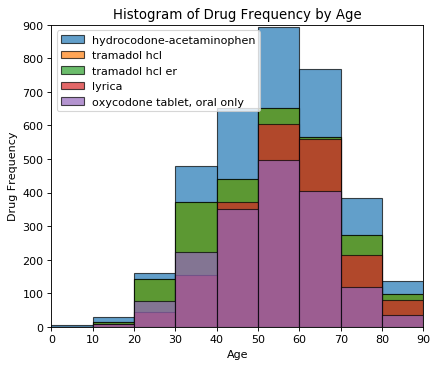

In [27]:
#figure size
plt.figure(figsize=(6,5), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five:
    subset=top_five_drug[top_five_drug['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',
                label=medicine)
plt.xlim(0,90)
plt.ylim(0,900)
plt.legend()
plt.title('Histogram of Drug Frequency by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

The frequency relationship of drug and age for female and male users are analyzed. First we selected female and male users then exratct the top five drugs for each gender. We note that the top five drugs are different for male and female users. The top five drugs for female users are: hydrocodone-acetaminophen, tramadol hcl er, tramadol hcl,lyrica and cymbalta. The drugs used by male in top five are: hydrocodone-acetaminophen, tramadol hcl, tramadol hcl er,lyrica and oxycodone tablet, oral only. Even though the top drugs are different, the distribution trend is the similar except at the pick. Average age of 50 is the pick for female users and for male users teh pick is 50 and 60. One can obivously note that the female users are greater in number than male users.

In [28]:
# Selecting only female users
df_female=df_data[df_data['Sex']=='Female']

In [29]:
# ESelecting only male users
df_male=df_data[df_data['Sex']=='Male']

Text(0, 0.5, 'Drug Frequency')

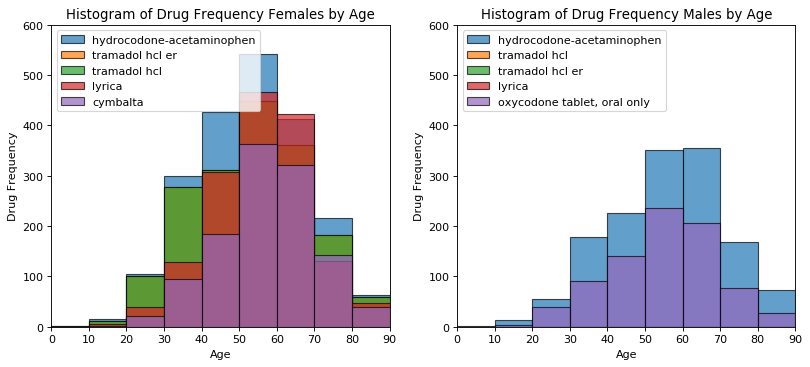

In [30]:
# Extract top five drugs used the most among Female users
drug_female=pd.Series(df_female.groupby('Drug')['Drug'].count())
drug_female=drug_female.sort_values(ascending=False)
top_five_female=drug_female.index[:5]

# Subset to the top 5 drugs
top_five_drug_female=df_female[df_female['Drug'].isin(top_five_female)]

#figure size
plt.figure(figsize=(12,5), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
plt.subplot(1,2,1)
for medicine in top_five_female:
    subset=top_five_drug_female[top_five_drug_female['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',
                label=medicine)
plt.xlim(0,90)  
plt.ylim(0,600)
plt.legend(loc='upper left')
plt.title('Histogram of Drug Frequency Females by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

# Extract top five drugs used the most among male users
drug_male=pd.Series(df_male.groupby('Drug')['Drug'].count())
drug_male=drug_male.sort_values(ascending=False)
top_five_male=drug_male.index[:5]

# Subset to the top 5 drugs
top_five_drug_male=df_male[df_male['Drug'].isin(top_five_male)]



# Iterate through each of the five drugs
plt.subplot(1,2,2)
for medicine in top_five:
    subset=top_five_drug_male[top_five_drug_male['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, edgecolor='k',
                label=medicine)
plt.xlim(0,90)
plt.ylim(0,600)
plt.legend(loc='upper left')
plt.title('Histogram of Drug Frequency Males by Age'); plt.xlabel('Age'); plt.ylabel('Drug Frequency')

#### 8.2.1.2 Frequency Histogram of EaseofUse and Effectiveness for top five drugs

#### a. Frequency Histogram of EaseofUse for top five drugs

Since we know the top five drugs used by the both male and female, we hard coded the drug type and extract the coresponding EaseofUse and plot histogram with hist function. Looking at the plot, the EaseofUse frequency generaly increases as the EasofUse increase. 

Text(0.5, 1.0, 'Histogram of EaseofUse Frequency')

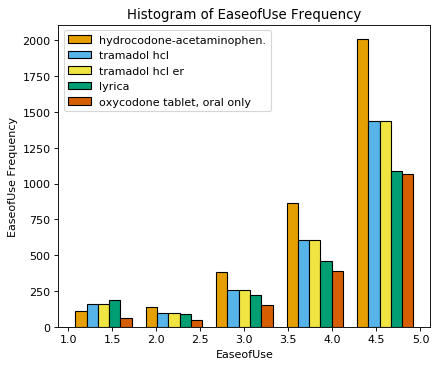

In [31]:
# Extract EaseofUse for top five drugs used  

x1 = list(df_data[df_data['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
x2 = list(df_data[df_data['Drug'] == 'tramadol hcl']['EaseofUse'])
x3 = list(df_data[df_data['Drug'] == 'tramadol hcl er']['EaseofUse'])
x4 = list(df_data[df_data['Drug'] == 'lyrica']['EaseofUse'])
x5 = list(df_data[df_data['Drug'] == 'oxycodone tablet, oral only']['EaseofUse'])

plt.figure(figsize=(6,5), dpi= 80)
# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Frequency')
plt.title('Histogram of EaseofUse Frequency')

#### b. The comparison of frequency histogram of EaseofUse for top five drugs between Female and Male Users

To see the effect of gender on the EaseofUse frequency for top five drugs, we plot the histogram for both gender implementing the same method above. The frequency trend for female users is very similar eith the over all frequency distribution presented above but the for male it is a little different.  

Text(0.5, 1.0, 'Histogram of EaseofUse Frequency of Male')

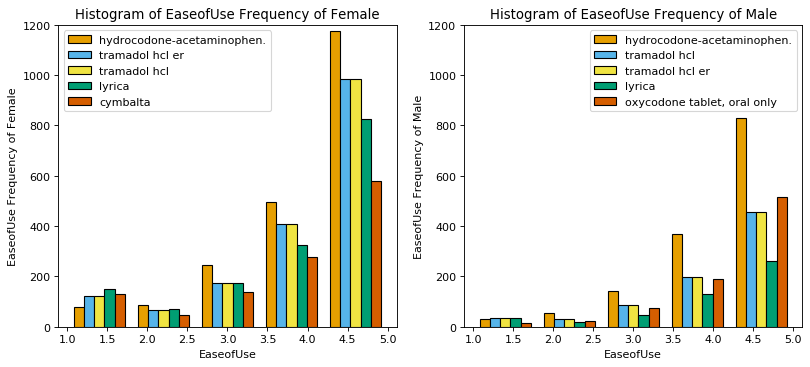

In [32]:
# Extract EaseofUse for top five drugs used  
plt.figure(figsize=(12,5), dpi= 80)
y1 = list(df_female[df_female['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
y2 = list(df_female[df_female['Drug'] == 'tramadol hcl er']['EaseofUse'])
y3 = list(df_female[df_female['Drug'] == 'tramadol hcl']['EaseofUse'])
y4 = list(df_female[df_female['Drug'] == 'lyrica']['EaseofUse'])
y5 = list(df_female[df_female['Drug'] == 'cymbalta']['EaseofUse'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl er', 'tramadol hcl',
         'lyrica', 'cymbalta']
plt.subplot(1, 2, 1)
plt.hist([y1, y2, y3, y4, y5], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Frequency of Female')
plt.ylim(0,1200)
plt.title('Histogram of EaseofUse Frequency of Female')
# Extract EaseofUse for top five drugs used  
x11 = list(df_male[df_male['Drug'] == 'hydrocodone-acetaminophen']['EaseofUse'])
x12 = list(df_male[df_male['Drug'] == 'tramadol hcl']['EaseofUse'])
x13 = list(df_male[df_male['Drug'] == 'tramadol hcl er']['EaseofUse'])
x14 = list(df_male[df_male['Drug'] == 'lyrica']['EaseofUse'])
x15 = list(df_male[df_male['Drug'] == 'oxycodone tablet, oral only']['EaseofUse'])
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.subplot(1, 2, 2)
plt.hist([x11, x12, x13, x14, x15], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Frequency of Male')
plt.ylim(0,1200)
plt.title('Histogram of EaseofUse Frequency of Male')

#### c. Frequency Histogram of Effectiveness for top five drugs 

Frequency Histogram of Effectiveness for top five drugs are also plotted for both gender in aggregate and in separate. Both extraction and plotting methods are the same as that used EaseofUse variable. Looking at the plot, the frequency of the first drug hydrocodone-acetaminophen is much higher that the next drugs.

Text(0.5, 1.0, 'Histogram of Effectiveness Frequency')

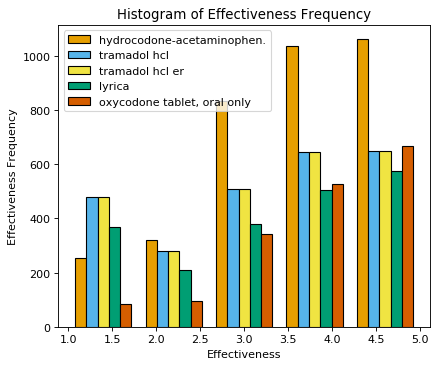

In [33]:
# Extract Effectiveness for top five drugs used  
plt.figure(figsize=(6,5), dpi= 80)
x6 = list(df_data[df_data['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x7 = list(df_data[df_data['Drug'] == 'tramadol hcl']['Effectiveness'])
x8 = list(df_data[df_data['Drug'] == 'tramadol hcl er']['Effectiveness'])
x9 = list(df_data[df_data['Drug'] == 'lyrica']['Effectiveness'])
x10 = list(df_data[df_data['Drug'] == 'oxycodone tablet, oral only']['Effectiveness'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']

plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Frequency')
plt.title('Histogram of Effectiveness Frequency')

#### d. Frequency Histogram of Effectiveness for top five drugs among Female and Male Users

In this section we plot the comparison of the frequency of effectiveness for top five drugs between Female and Male users. The effectiveness frequency distribution of female users and the aggregated frequency distribution is similar  

Text(0.5, 1.0, 'Histogram of Effectiveness Frequency of Male')

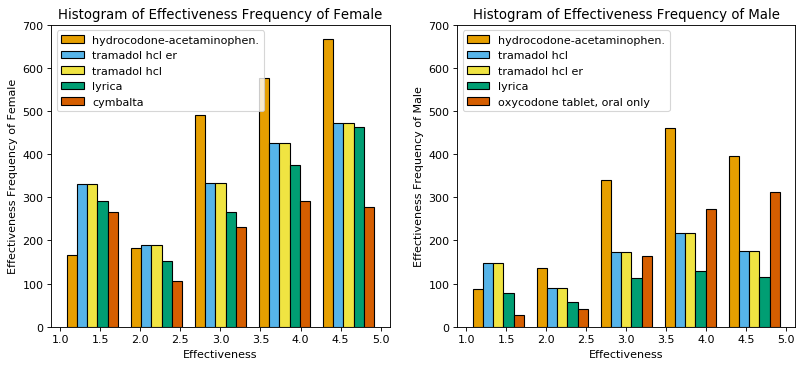

In [34]:
plt.figure(figsize=(12,5), dpi= 80)
# Extract Effectiveness for top five drugs used  
x6 = list(df_female[df_female['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x7 = list(df_female[df_female['Drug'] == 'tramadol hcl er']['Effectiveness'])
x8 = list(df_female[df_female['Drug'] == 'tramadol hcl']['Effectiveness'])
x9 = list(df_female[df_female['Drug'] == 'lyrica']['Effectiveness'])
x10 = list(df_female[df_female['Drug'] == 'cymbalta']['Effectiveness'])

# Assign colors for each Drug and EaseofUse
colors = ['#E69F00', '#56B4E9', '#F0E442', '#009E73', '#D55E00']
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl er', 'tramadol hcl',
         'lyrica', 'cymbalta']
plt.subplot(1,2,1)
plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Frequency of Female')
plt.ylim(0,700)
plt.title('Histogram of Effectiveness Frequency of Female')

# Extract Effectiveness for top five drugs used  
x16 = list(df_male[df_male['Drug'] == 'hydrocodone-acetaminophen']['Effectiveness'])
x17 = list(df_male[df_male['Drug'] == 'tramadol hcl']['Effectiveness'])
x18 = list(df_male[df_male['Drug'] == 'tramadol hcl er']['Effectiveness'])
x19 = list(df_male[df_male['Drug'] == 'lyrica']['Effectiveness'])
x110 = list(df_male[df_male['Drug'] == 'oxycodone tablet, oral only']['Effectiveness'])

plt.subplot(1,2,2)
druglist = ['hydrocodone-acetaminophen.', 'tramadol hcl', 'tramadol hcl er',
         'lyrica', 'oxycodone tablet, oral only']
plt.hist([x16, x17, x18, x19, x110], bins = 5, edgecolor='k',
         color = colors, label=druglist)

# Plot formatting
plt.legend(loc='upper left')
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Frequency of Male')
plt.ylim(0,700)
plt.title('Histogram of Effectiveness Frequency of Male')

# 9.2 Probability Histogram

### 9.2.1 Probability Histogram of top five Drug by Age

Text(0, 0.5, 'Drug Probability')

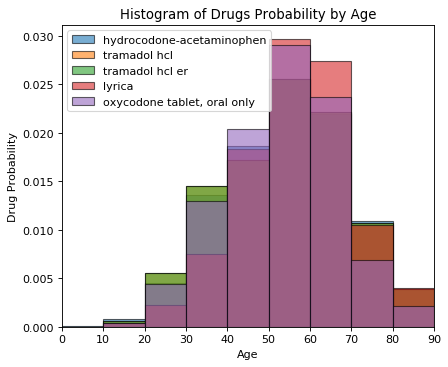

In [35]:
#figure size
plt.figure(figsize=(6,5), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
for medicine in top_five:
    subset=top_five_drug[top_five_drug['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.6,edgecolor='k', density=True,
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Probability by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

In [36]:
### Proability Histogram of top five Drug by Age of Female and Male

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


Text(0, 0.5, 'Drug Probability')

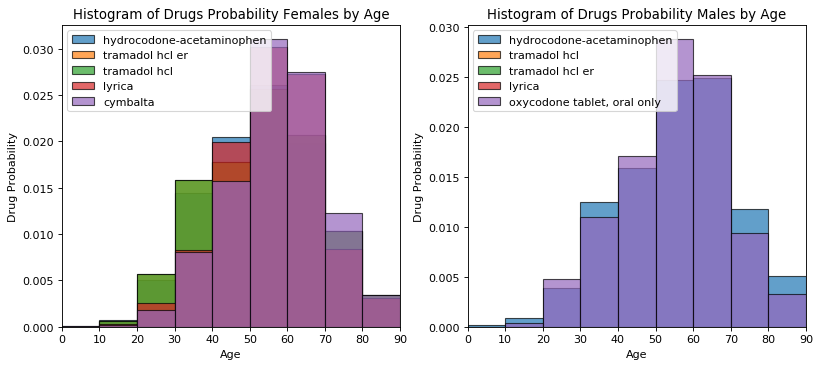

In [37]:
#figure size
plt.figure(figsize=(12,5), dpi= 80)
bins=[0,10,20,30,40,50,60,70,80, 90]

# Iterate through each of the five drugs
plt.subplot(1,2,1)
for medicine in top_five_female:
    subset=top_five_drug_female[top_five_drug_female['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7,density=True, edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Probability Females by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

plt.subplot(1,2,2)
for medicine in top_five:
    subset=top_five_drug_male[top_five_drug_male['Drug']==medicine]
    plt.hist(subset['Age'],bins=bins,alpha=0.7, density=True, edgecolor='k',
                label=medicine)
plt.xlim(0,90)    
plt.legend()
plt.title('Histogram of Drugs Probability Males by Age'); plt.xlabel('Age'); plt.ylabel('Drug Probability')

In [38]:
### Proability Histogram of EaseofUse for top five drugs

Text(0.5, 1.0, 'Histogram of EaseofUse Probability')

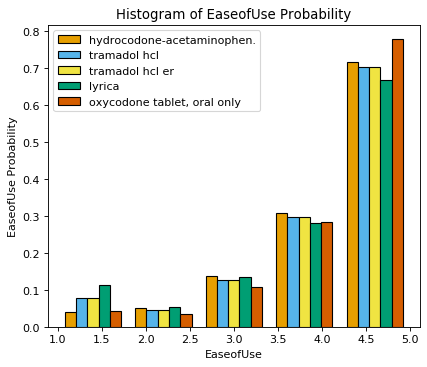

In [39]:
plt.figure(figsize=(6,5), dpi= 80)
plt.hist([x1, x2, x3, x4, x5], bins = 5, edgecolor='k', density=True,
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('EaseofUse')
plt.ylabel('EaseofUse Probability')
plt.title('Histogram of EaseofUse Probability')

In [40]:
### Proability Histogram of Effectiveness for top five drugs

Text(0.5, 1.0, 'Histogram of Effectiveness Probability')

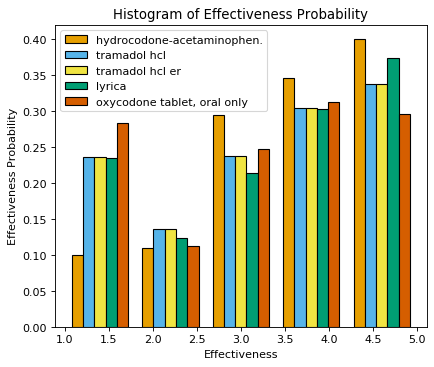

In [41]:
plt.figure(figsize=(6,5), dpi= 80)
plt.hist([x6, x7, x8, x9, x10], bins = 5, edgecolor='k', density=True,
         color = colors, label=druglist)

# Plot formatting
plt.legend()
plt.xlabel('Effectiveness')
plt.ylabel('Effectiveness Probability')
plt.title('Histogram of Effectiveness Probability')

# 10 Which variable Effectiveness or EaseofUse determine the RATING of the drug the best

## 10.1 Relationship between variables

It is always good to start to figure out the relationship between variable before dealing with which variables are more determine the our target variable. We plot the relationship between Age and EaseofUse, Age and Effectiveness, Age and Rating, EaseofUse and Effectiveness, Rating and EaseofUse and Rating and Effectiveness. Looking at the plot it is difficult to come up with conclusion. 

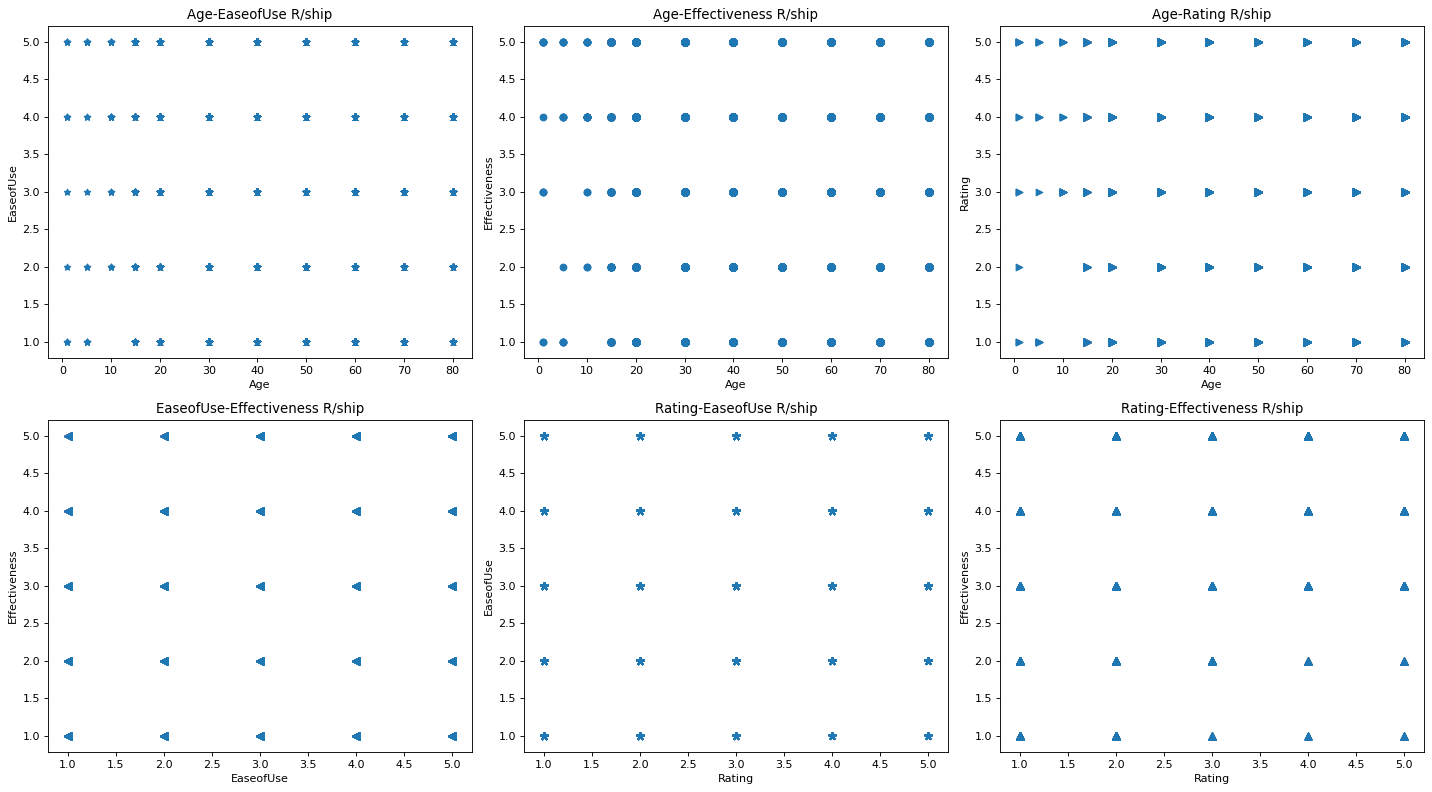

In [42]:
plt.figure(figsize=(18,10), dpi= 80)

Age=df_data['Age']
EaseofUse=df_data['EaseofUse']
Effectiveness=df_data['Effectiveness']
Rating=df_data['Rating']
plt.subplot(2,3,1)
plt.scatter(Age,EaseofUse, marker=(5,1))
plt.title('Age-EaseofUse R/ship')
plt.xlabel('Age')
plt.ylabel('EaseofUse')
plt.subplot(2,3,2)
plt.scatter(Age,Effectiveness, marker='o')
plt.title('Age-Effectiveness R/ship')
plt.xlabel('Age')
plt.ylabel('Effectiveness')
plt.subplot(2,3,3)
plt.scatter(Age,Rating, marker='>')
plt.title('Age-Rating R/ship')
plt.xlabel('Age')
plt.ylabel('Rating')
plt.subplot(2,3,4)
plt.scatter(EaseofUse,Effectiveness, marker='<')
plt.title('EaseofUse-Effectiveness R/ship')
plt.xlabel('EaseofUse')
plt.ylabel('Effectiveness')
plt.subplot(2,3,5)
plt.scatter(Rating,EaseofUse, marker=(5,2))
plt.title('Rating-EaseofUse R/ship')
plt.xlabel('Rating')
plt.ylabel('EaseofUse')
plt.subplot(2,3,6)
plt.scatter(Rating,Effectiveness, marker='^')
plt.title('Rating-Effectiveness R/ship')
plt.xlabel('Rating')
plt.ylabel('Effectiveness')
plt.tight_layout()
plt.show()

## 10.2 Calculate the comparison ratio

Since the total number of each drug used is different and the corresponding cumulative EaseofUse and Effectiveness are also diffrent. Thus, in order to compare the effect of EaseofUse and Effectiveness of the drug on the Rating, the commulative Easeof Use and Effectiveness should be normilized by number of drugs used for each condition. In onther words we will group the drug and sum the corresponding EaseofUse and Effectiveness and normilize by the total drug. 

In [43]:
#### Commulative EaseofUse per drug in descending order
commulative_EaseofUse_per_drug=df_data.groupby('Drug').EaseofUse.sum().sort_values(ascending=False)

In [44]:
#to display the top 5 rows
commulative_EaseofUse_per_drug.head(5)

Drug
hydrocodone-acetaminophen    15034
tramadol hcl                 10745
tramadol hcl er              10745
lyrica                        8291
oxycodone hcl solution        7494
Name: EaseofUse, dtype: int64

In [45]:
#### Commulative Effectiveness per drug in descending order
commulative_Effectiveness_per_drug=df_data.groupby('Drug').Effectiveness.sum().sort_values(ascending=False)

In [46]:
#to display the top 5 rows
commulative_Effectiveness_per_drug.head(5)

Drug
hydrocodone-acetaminophen    12843
tramadol hcl er               8374
tramadol hcl                  8374
lyrica                        6828
oxycodone hcl                 6735
Name: Effectiveness, dtype: int64

In [47]:
#### Drug count
Drug_count=df_data.Drug.value_counts()

In [48]:
#to display the top 10 rows
Drug_count.head(10)

hydrocodone-acetaminophen      3504
tramadol hcl er                2557
tramadol hcl                   2557
lyrica                         2039
oxycodone hcl er               1713
oxycodone hcl solution         1713
oxycodone hcl                  1713
oxycodone tablet, oral only    1713
cymbalta                       1442
neurontin                      1387
Name: Drug, dtype: int64

Once we calculate the cumulative EaseofUse and cumulative Effectiveness as well the corresponding total drug, the next step will be normilizing the calculated cumulative EaseofUse and cumulative Effectiveness by total drug.

In [49]:
#normilize EaseofUse
EaseofUse_Drug_ratio = (commulative_EaseofUse_per_drug / Drug_count).sort_values(ascending=False)

In [50]:
#normilize Effectiveness
Effectiveness_Drug_ratio = (commulative_Effectiveness_per_drug / Drug_count).sort_values(ascending=False)

In order to decide the effective variable to that determine the rating, it important to compare with rating itself. So we'll calculate the commulative rating for each drugs and normilize with total drug.

In [51]:
#### Commulative Rating per drug in descending order
commulative_Rating_per_drug=df_data.groupby('Drug').Rating.sum().sort_values(ascending=False)

In [52]:
#to display the top 10 rows
commulative_Rating_per_drug.head(10)

Drug
hydrocodone-acetaminophen      12475
tramadol hcl er                 7862
tramadol hcl                    7862
oxycodone hcl                   6424
oxycodone hcl er                6424
oxycodone hcl solution          6424
oxycodone tablet, oral only     6424
lyrica                          6119
oxycontin                       4805
vicodin                         4613
Name: Rating, dtype: int64

In [53]:
#normilize Rating
Rating_Drug_ratio = (commulative_Rating_per_drug / Drug_count).sort_values(ascending=False)

Finally we plot the comparison graph including the imaginary x=y graph  included for comparison porpuse. Looking at the comparison plot: drug effectiveness variable can determine the rating of the drug over the EaseofUse.

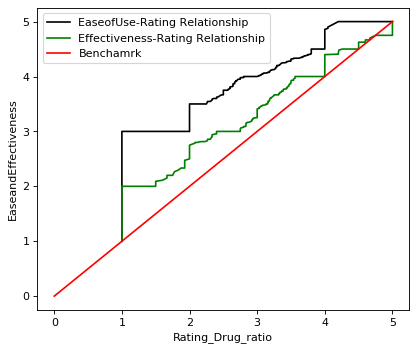

In [54]:
#Imaginary y=x function for comparison porpuse
plt.figure(figsize=(6,5), dpi= 80)
x=[0,1,2,3,4,5]
y=[0,1,2,3,4,5]
plt.plot(Rating_Drug_ratio,EaseofUse_Drug_ratio, 'k', label='EaseofUse-Rating Relationship')
plt.plot(Rating_Drug_ratio, Effectiveness_Drug_ratio, 'g', label='Effectiveness-Rating Relationship')
plt.plot(x,y,'r', label='Benchamrk')
plt.xlabel('Rating_Drug_ratio')
plt.ylabel('EaseandEffectiveness')
plt.legend()
plt.show()

For further comparison to know which variable is effective to determine the rating, the effect of these variables for Female and Male separately. Thus, we calculate the cumulative EaseofUse, Effectiveness and Rating of Female and Male users. As shown in the plot, the effectiveness variable is more detrmine the rating for Male users but the same didn't work for Female users. 

In [55]:
#cumulative EaseofUse, Effectiveness and Rating of Female users
commulative_EaseofUse_per_drug_female = df_female.groupby('Drug').EaseofUse.sum().sort_values(ascending=False)
commulative_Effectiveness_per_drug_female = df_female.groupby('Drug').Effectiveness.sum().sort_values(ascending=False)
commulative_Rating_per_drug_female = df_female.groupby('Drug').Rating.sum().sort_values(ascending=False)

In [56]:
#cumulative EaseofUse, Effectiveness and Rating of Male users
commulative_EaseofUse_per_drug_male = df_male.groupby('Drug').EaseofUse.sum().sort_values(ascending=False)
commulative_Effectiveness_per_drug_male = df_male.groupby('Drug').Effectiveness.sum().sort_values(ascending=False)
commulative_Rating_per_drug_male = df_male.groupby('Drug').Rating.sum().sort_values(ascending=False)

In [57]:
#normilized EaseofUse, Effectiveness and Rating of Female users
EaseofUse_Drug_ratio_female = (commulative_EaseofUse_per_drug_female / Drug_count).sort_values(ascending=False)
Effectiveness_Drug_ratio_female = (commulative_Effectiveness_per_drug_female / Drug_count).sort_values(ascending=False)
Rating_Drug_ratio_female = (commulative_Rating_per_drug_female / Drug_count).sort_values(ascending=False)

In [58]:
#normilized EaseofUse, Effectiveness and Rating of Male users
EaseofUse_Drug_ratio_male = (commulative_EaseofUse_per_drug_male / Drug_count).sort_values(ascending=False)
Effectiveness_Drug_ratio_male = (commulative_Effectiveness_per_drug_male / Drug_count).sort_values(ascending=False)
Rating_Drug_ratio_male = (commulative_Rating_per_drug_male / Drug_count).sort_values(ascending=False)

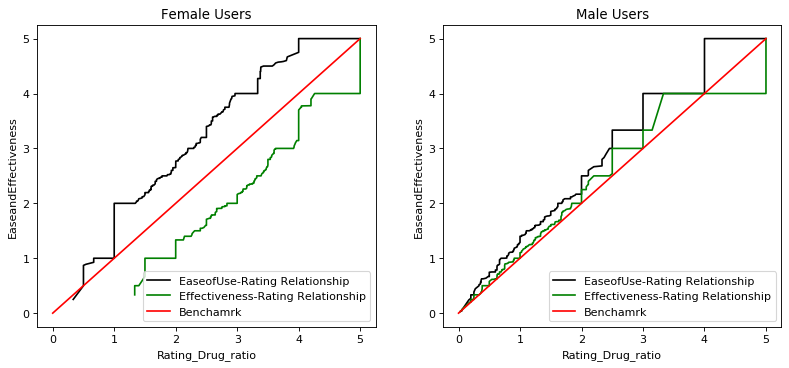

In [59]:
#Imaginary y=x function for comparison porpuse
plt.figure(figsize=(12,5), dpi= 80)

x=[0,1,2,3,4,5]
y=[0,1,2,3,4,5]
plt.subplot(1,2,1)
plt.plot(Rating_Drug_ratio_female,EaseofUse_Drug_ratio_female, 'k', label='EaseofUse-Rating Relationship')
plt.plot(Rating_Drug_ratio, Effectiveness_Drug_ratio_female, 'g', label='Effectiveness-Rating Relationship')
plt.plot(x,y,'r', label='Benchamrk')
plt.xlabel('Rating_Drug_ratio')
plt.ylabel('EaseandEffectiveness')
plt.title('Female Users')
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(Rating_Drug_ratio_male,EaseofUse_Drug_ratio_male, 'k', label='EaseofUse-Rating Relationship')
plt.plot(Rating_Drug_ratio_male, Effectiveness_Drug_ratio_male, 'g', label='Effectiveness-Rating Relationship')
plt.plot(x,y,'r', label='Benchamrk')
plt.xlabel('Rating_Drug_ratio')
plt.ylabel('EaseandEffectiveness')
plt.title('Male Users')
plt.legend(loc='lower right')

Since the above calculated ratio specially for Female users doesn't determine the effective variable to dertermine the rating we come up with another method comparing the mean value of EaseofUse and Effectiveness with mean value of Rating for different age. Looking at the plot, the Effectiveness determine more compared to EaseofUse for both genders.

In [60]:
df_female_mean=df_female.groupby('Age').mean()

In [61]:
df_female_mean

,EaseofUse,Effectiveness,Rating
Age,,,
1,2.714286,3.285714,3.142857
5,3.777778,3.666667,3.444444
10,4.000000,3.900000,3.400000
15,4.016892,3.307432,2.912162
20,4.210140,3.625276,3.243204
30,4.112437,3.521612,3.248475
40,4.111505,3.493590,3.276991
50,4.129394,3.474443,3.241712
60,4.177722,3.509804,3.274371


In [62]:
df_male_mean=df_male.groupby('Age').mean()

In [63]:
df_male_mean

,EaseofUse,Effectiveness,Rating
Age,,,
1,4.200000,4.400000,4.200000
5,2.000000,2.800000,2.600000
10,3.818182,4.090909,4.181818
15,4.263158,3.666667,3.377193
20,4.276206,3.668885,3.430948
30,4.310598,3.673055,3.483089
40,4.313844,3.701999,3.528480
50,4.225793,3.580958,3.416010
60,4.289270,3.570172,3.407725


<Figure size 480x400 with 0 Axes>

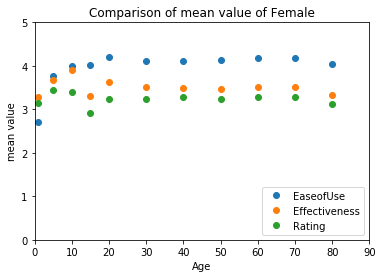

In [65]:
plt.figure(figsize=(6,5), dpi= 80)
Age=[0,5,10,15,20,30,40,50,60,70,80]
df_female_mean.plot(style='o')
# Plot formatting
plt.xlabel('Age')
plt.ylabel('mean value')
plt.xlim(0,90)
plt.ylim(0,5)
plt.title('Comparison of mean value of Female')
plt.legend(loc='lower right')

<Figure size 480x400 with 0 Axes>

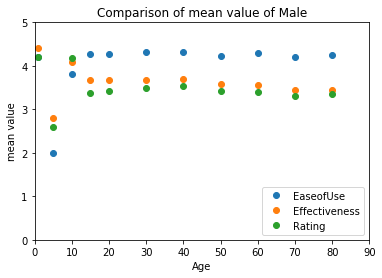

In [66]:
plt.figure(figsize=(6,5), dpi= 80)
Age=[0,5,10,15,20,30,40,50,60,70,80]
df_male_mean.plot(style='o')
# Plot formatting
plt.xlabel('Age')
plt.ylabel('mean value')
plt.xlim(0,90)
plt.ylim(0,5)
plt.title('Comparison of mean value of Male')
plt.legend(loc='lower right')
